In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MiniProject/royapuram_model.csv')

In [5]:
df

,Unnamed: 0,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,0,Monday,01-08-2022,00:00:00,20.0,31.0,22.647152,2.0,40.0,9.0,40
1,1,Monday,01-08-2022,01:00:00,20.0,30.0,22.647152,3.0,37.0,9.0,40
2,2,Monday,01-08-2022,02:00:00,23.5,27.5,22.647152,2.5,39.5,8.5,41
3,3,Monday,01-08-2022,03:00:00,27.0,25.0,22.647152,2.0,42.0,8.0,41
4,4,Monday,01-08-2022,04:00:00,20.0,20.0,22.647152,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...,...
739,739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.000000,5.0,63.0,4.0,51
740,740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.000000,6.0,86.0,6.0,56
741,741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.000000,3.0,77.0,6.0,59
742,742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.000000,4.0,106.0,7.0,65


In [6]:
pd.isnull(df).sum()

Unnamed: 0    0
Day           0
Date          0
Time          0
PM2.5         0
PM10          0
NO2           0
SO2           0
CO            0
OZONE         0
AQI           0
dtype: int64

In [7]:
df1 = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df1

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,22.647152,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,22.647152,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,23.5,27.5,22.647152,2.5,39.5,8.5,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,22.647152,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,22.647152,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...
739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.000000,5.0,63.0,4.0,51
740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.000000,6.0,86.0,6.0,56
741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.000000,3.0,77.0,6.0,59
742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.000000,4.0,106.0,7.0,65


In [9]:
df_aqi = df1['AQI']

In [10]:
df_aqi

0      40
1      40
2      41
3      41
4      41
       ..
739    51
740    56
741    59
742    65
743    72
Name: AQI, Length: 744, dtype: int64

In [11]:
ddf = df1[['AQI']]

In [12]:
df1[9 :1]

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI


In [13]:
ddf[:672]

,AQI
0,40
1,40
2,41
3,41
4,41
...,...
667,62
668,60
669,67
670,73


In [14]:
ddf[669:]

,AQI
669,67
670,73
671,80
672,85
673,90
...,...
739,51
740,56
741,59
742,65


In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
ddf = scaler.fit_transform(ddf)

In [16]:
ddf

array([[0.      ],
       [0.      ],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.03125 ],
       [0.09375 ],
       [0.15625 ],
       [0.1875  ],
       [0.203125],
       [0.25    ],
       [0.296875],
       [0.328125],
       [0.34375 ],
       [0.34375 ],
       [0.3125  ],
       [0.265625],
       [0.265625],
       [0.25    ],
       [0.21875 ],
       [0.203125],
       [0.171875],
       [0.140625],
       [0.125   ],
       [0.140625],
       [0.140625],
       [0.15625 ],
       [0.15625 ],
       [0.15625 ],
       [0.140625],
       [0.125   ],
       [0.125   ],
       [0.09375 ],
       [0.078125],
       [0.0625  ],
       [0.0625  ],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.0625  ],
       [0.078125],
       [0.09375 ],
       [0.125   ],
       [0.171875],
       [0.21875 ],
       [0.265625],
       [0.296875],
       [0.3125  ],
       [0.32

In [17]:
train_size = int(len(ddf) * 0.9033)
test_size = len(ddf) - train_size
train, test = ddf[0:train_size,:], ddf[train_size:len(ddf),:]
print(len(train), len(test))

672 72


In [18]:
scaler.inverse_transform(train)

array([[ 40.],
       [ 40.],
       [ 41.],
       [ 41.],
       [ 41.],
       [ 41.],
       [ 41.],
       [ 41.],
       [ 42.],
       [ 46.],
       [ 50.],
       [ 52.],
       [ 53.],
       [ 56.],
       [ 59.],
       [ 61.],
       [ 62.],
       [ 62.],
       [ 60.],
       [ 57.],
       [ 57.],
       [ 56.],
       [ 54.],
       [ 53.],
       [ 51.],
       [ 49.],
       [ 48.],
       [ 49.],
       [ 49.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 49.],
       [ 48.],
       [ 48.],
       [ 46.],
       [ 45.],
       [ 44.],
       [ 44.],
       [ 43.],
       [ 43.],
       [ 43.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 48.],
       [ 51.],
       [ 54.],
       [ 57.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 61.],
       [ 62.],
       [ 64.],
       [ 63.],
       [ 62.],
       [ 59.],
       [ 60.],
       [ 59.],
       [ 62.],
       [ 65.],
       [ 63.],
       [ 60.],
       [ 58.],
       [ 5

In [19]:
df.loc[:672,"AQI":]

,AQI
0,40
1,40
2,41
3,41
4,41
...,...
668,60
669,67
670,73
671,80


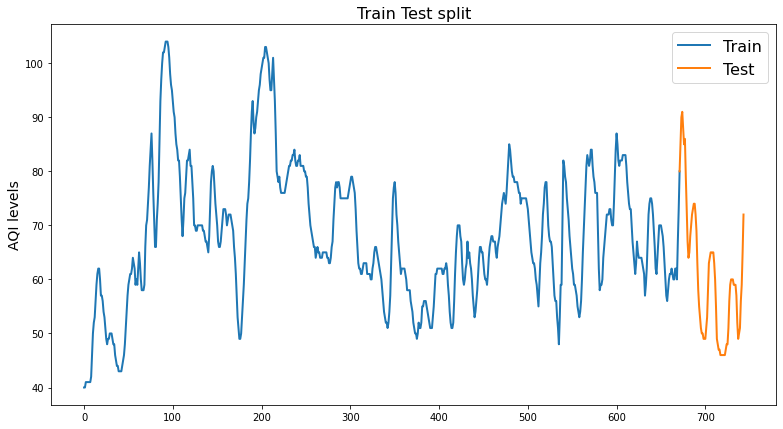

In [20]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df.loc[:671,"AQI":], label='Train', linewidth=2)
ax.plot(df.loc[671:,"AQI":], label='Test', linewidth=2)
ax.set_ylabel('AQI levels', fontsize=14)
ax.set_title('Train Test split', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [21]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
trainX

array([[0.      ],
       [0.      ],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.03125 ],
       [0.09375 ],
       [0.15625 ],
       [0.1875  ],
       [0.203125],
       [0.25    ],
       [0.296875],
       [0.328125],
       [0.34375 ],
       [0.34375 ],
       [0.3125  ],
       [0.265625],
       [0.265625],
       [0.25    ],
       [0.21875 ],
       [0.203125],
       [0.171875],
       [0.140625],
       [0.125   ],
       [0.140625],
       [0.140625],
       [0.15625 ],
       [0.15625 ],
       [0.15625 ],
       [0.140625],
       [0.125   ],
       [0.125   ],
       [0.09375 ],
       [0.078125],
       [0.0625  ],
       [0.0625  ],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.0625  ],
       [0.078125],
       [0.09375 ],
       [0.125   ],
       [0.171875],
       [0.21875 ],
       [0.265625],
       [0.296875],
       [0.3125  ],
       [0.32

In [24]:
trainY

array([0.      , 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.03125 , 0.09375 , 0.15625 , 0.1875  , 0.203125,
       0.25    , 0.296875, 0.328125, 0.34375 , 0.34375 , 0.3125  ,
       0.265625, 0.265625, 0.25    , 0.21875 , 0.203125, 0.171875,
       0.140625, 0.125   , 0.140625, 0.140625, 0.15625 , 0.15625 ,
       0.15625 , 0.140625, 0.125   , 0.125   , 0.09375 , 0.078125,
       0.0625  , 0.0625  , 0.046875, 0.046875, 0.046875, 0.046875,
       0.0625  , 0.078125, 0.09375 , 0.125   , 0.171875, 0.21875 ,
       0.265625, 0.296875, 0.3125  , 0.328125, 0.328125, 0.34375 ,
       0.375   , 0.359375, 0.34375 , 0.296875, 0.3125  , 0.296875,
       0.34375 , 0.390625, 0.359375, 0.3125  , 0.28125 , 0.28125 ,
       0.28125 , 0.296875, 0.40625 , 0.46875 , 0.484375, 0.53125 ,
       0.578125, 0.640625, 0.6875  , 0.734375, 0.65625 , 0.5625  ,
       0.484375, 0.40625 , 0.40625 , 0.484375, 0.53125 , 0.59375 ,
       0.71875 , 0.828125, 0.890625, 0.9375  , 0.96875 , 0.968

In [25]:
testX

array([[0.703125],
       [0.78125 ],
       [0.796875],
       [0.75    ],
       [0.703125],
       [0.71875 ],
       [0.609375],
       [0.515625],
       [0.421875],
       [0.375   ],
       [0.390625],
       [0.4375  ],
       [0.46875 ],
       [0.5     ],
       [0.515625],
       [0.53125 ],
       [0.53125 ],
       [0.5     ],
       [0.453125],
       [0.359375],
       [0.28125 ],
       [0.234375],
       [0.203125],
       [0.171875],
       [0.15625 ],
       [0.15625 ],
       [0.140625],
       [0.140625],
       [0.140625],
       [0.171875],
       [0.203125],
       [0.28125 ],
       [0.359375],
       [0.375   ],
       [0.390625],
       [0.390625],
       [0.390625],
       [0.390625],
       [0.359375],
       [0.3125  ],
       [0.234375],
       [0.140625],
       [0.125   ],
       [0.109375],
       [0.109375],
       [0.09375 ],
       [0.09375 ],
       [0.09375 ],
       [0.09375 ],
       [0.09375 ],
       [0.09375 ],
       [0.109375],
       [0.12

In [26]:
testY

array([0.78125 , 0.796875, 0.75    , 0.703125, 0.71875 , 0.609375,
       0.515625, 0.421875, 0.375   , 0.390625, 0.4375  , 0.46875 ,
       0.5     , 0.515625, 0.53125 , 0.53125 , 0.5     , 0.453125,
       0.359375, 0.28125 , 0.234375, 0.203125, 0.171875, 0.15625 ,
       0.15625 , 0.140625, 0.140625, 0.140625, 0.171875, 0.203125,
       0.28125 , 0.359375, 0.375   , 0.390625, 0.390625, 0.390625,
       0.390625, 0.359375, 0.3125  , 0.234375, 0.140625, 0.125   ,
       0.109375, 0.109375, 0.09375 , 0.09375 , 0.09375 , 0.09375 ,
       0.09375 , 0.09375 , 0.109375, 0.125   , 0.125   , 0.171875,
       0.25    , 0.296875, 0.3125  , 0.3125  , 0.3125  , 0.296875,
       0.296875, 0.296875, 0.265625, 0.1875  , 0.140625, 0.15625 ,
       0.171875, 0.25    , 0.296875, 0.390625])

In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
trainX

array([[[0.      ]],

       [[0.      ]],

       [[0.015625]],

       [[0.015625]],

       [[0.015625]],

       [[0.015625]],

       [[0.015625]],

       [[0.015625]],

       [[0.03125 ]],

       [[0.09375 ]],

       [[0.15625 ]],

       [[0.1875  ]],

       [[0.203125]],

       [[0.25    ]],

       [[0.296875]],

       [[0.328125]],

       [[0.34375 ]],

       [[0.34375 ]],

       [[0.3125  ]],

       [[0.265625]],

       [[0.265625]],

       [[0.25    ]],

       [[0.21875 ]],

       [[0.203125]],

       [[0.171875]],

       [[0.140625]],

       [[0.125   ]],

       [[0.140625]],

       [[0.140625]],

       [[0.15625 ]],

       [[0.15625 ]],

       [[0.15625 ]],

       [[0.140625]],

       [[0.125   ]],

       [[0.125   ]],

       [[0.09375 ]],

       [[0.078125]],

       [[0.0625  ]],

       [[0.0625  ]],

       [[0.046875]],

       [[0.046875]],

       [[0.046875]],

       [[0.046875]],

       [[0.0625  ]],

       [[0.078125]],

       [[0

In [29]:
trainY

array([0.      , 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.03125 , 0.09375 , 0.15625 , 0.1875  , 0.203125,
       0.25    , 0.296875, 0.328125, 0.34375 , 0.34375 , 0.3125  ,
       0.265625, 0.265625, 0.25    , 0.21875 , 0.203125, 0.171875,
       0.140625, 0.125   , 0.140625, 0.140625, 0.15625 , 0.15625 ,
       0.15625 , 0.140625, 0.125   , 0.125   , 0.09375 , 0.078125,
       0.0625  , 0.0625  , 0.046875, 0.046875, 0.046875, 0.046875,
       0.0625  , 0.078125, 0.09375 , 0.125   , 0.171875, 0.21875 ,
       0.265625, 0.296875, 0.3125  , 0.328125, 0.328125, 0.34375 ,
       0.375   , 0.359375, 0.34375 , 0.296875, 0.3125  , 0.296875,
       0.34375 , 0.390625, 0.359375, 0.3125  , 0.28125 , 0.28125 ,
       0.28125 , 0.296875, 0.40625 , 0.46875 , 0.484375, 0.53125 ,
       0.578125, 0.640625, 0.6875  , 0.734375, 0.65625 , 0.5625  ,
       0.484375, 0.40625 , 0.40625 , 0.484375, 0.53125 , 0.59375 ,
       0.71875 , 0.828125, 0.890625, 0.9375  , 0.96875 , 0.968

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 10)

In [31]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
r1 = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, callbacks = [es], validation_data=(testX, testY))

Epoch 1/100
670/670 - 4s - loss: 0.1047 - val_loss: 0.0509 - 4s/epoch - 6ms/step
Epoch 2/100
670/670 - 1s - loss: 0.0362 - val_loss: 0.0443 - 1s/epoch - 2ms/step
Epoch 3/100
670/670 - 1s - loss: 0.0271 - val_loss: 0.0304 - 1s/epoch - 2ms/step
Epoch 4/100
670/670 - 1s - loss: 0.0178 - val_loss: 0.0199 - 1s/epoch - 2ms/step
Epoch 5/100
670/670 - 1s - loss: 0.0094 - val_loss: 0.0104 - 1s/epoch - 2ms/step
Epoch 6/100
670/670 - 1s - loss: 0.0038 - val_loss: 0.0047 - 1s/epoch - 2ms/step
Epoch 7/100
670/670 - 1s - loss: 0.0018 - val_loss: 0.0025 - 1s/epoch - 2ms/step
Epoch 8/100
670/670 - 1s - loss: 0.0015 - val_loss: 0.0021 - 1s/epoch - 2ms/step
Epoch 9/100
670/670 - 1s - loss: 0.0014 - val_loss: 0.0025 - 1s/epoch - 2ms/step
Epoch 10/100
670/670 - 1s - loss: 0.0014 - val_loss: 0.0020 - 1s/epoch - 2ms/step
Epoch 11/100
670/670 - 1s - loss: 0.0014 - val_loss: 0.0025 - 1s/epoch - 2ms/step
Epoch 12/100
670/670 - 1s - loss: 0.0014 - val_loss: 0.0021 - 1s/epoch - 2ms/step
Epoch 13/100
670/670 - 1s

In [32]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 5ms/step
Train Score: 2.30 RMSE
Test Score: 2.92 RMSE


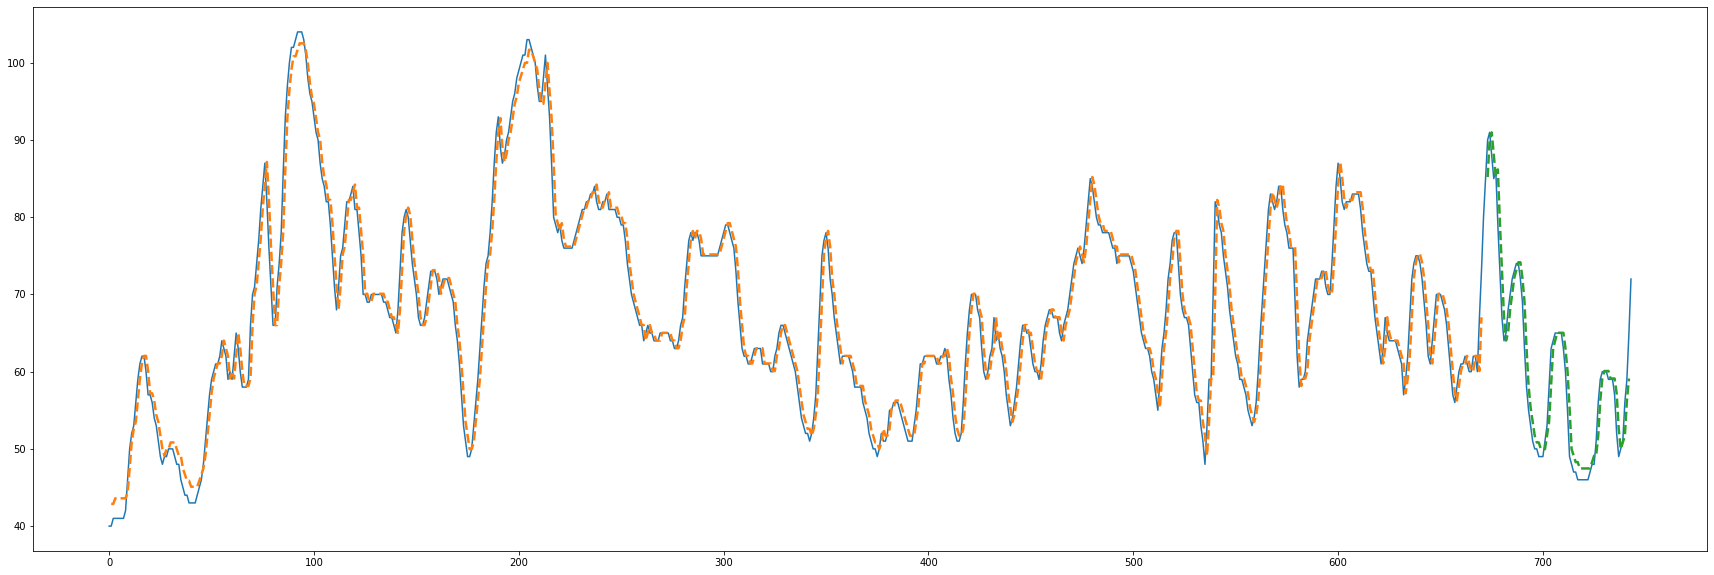

In [33]:
trainPredictPlot = np.empty_like(ddf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(ddf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(ddf)-1, :] = testPredict
# plot baseline and predictions
fig = plt.figure(figsize=(30, 10))
plt.plot(scaler.inverse_transform(ddf))
plt.plot(trainPredictPlot, linestyle = 'dashed', label = 'Predicted training', linewidth = 2.5)
plt.plot(testPredictPlot, linestyle = 'dashed', label = 'Predicted testing', linewidth = 2.5)
plt.show()

In [34]:
def create_dataset2(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [35]:
ddf

array([[0.      ],
       [0.      ],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.015625],
       [0.03125 ],
       [0.09375 ],
       [0.15625 ],
       [0.1875  ],
       [0.203125],
       [0.25    ],
       [0.296875],
       [0.328125],
       [0.34375 ],
       [0.34375 ],
       [0.3125  ],
       [0.265625],
       [0.265625],
       [0.25    ],
       [0.21875 ],
       [0.203125],
       [0.171875],
       [0.140625],
       [0.125   ],
       [0.140625],
       [0.140625],
       [0.15625 ],
       [0.15625 ],
       [0.15625 ],
       [0.140625],
       [0.125   ],
       [0.125   ],
       [0.09375 ],
       [0.078125],
       [0.0625  ],
       [0.0625  ],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.046875],
       [0.0625  ],
       [0.078125],
       [0.09375 ],
       [0.125   ],
       [0.171875],
       [0.21875 ],
       [0.265625],
       [0.296875],
       [0.3125  ],
       [0.32

In [36]:
look_back = 3
trainX2, trainY2 = create_dataset(train, look_back)
testX2, testY2 = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX2 = np.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
testX2 = np.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

In [37]:
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, look_back)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
r2 = model2.fit(trainX2, trainY2, epochs=100, batch_size=1, verbose=2, callbacks = [es], validation_data=(testX2, testY2))

Epoch 1/100
668/668 - 4s - loss: 0.0299 - val_loss: 0.0115 - 4s/epoch - 6ms/step
Epoch 2/100
668/668 - 1s - loss: 0.0061 - val_loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 3/100
668/668 - 1s - loss: 0.0042 - val_loss: 0.0054 - 1s/epoch - 2ms/step
Epoch 4/100
668/668 - 2s - loss: 0.0038 - val_loss: 0.0053 - 2s/epoch - 2ms/step
Epoch 5/100
668/668 - 1s - loss: 0.0034 - val_loss: 0.0052 - 1s/epoch - 2ms/step
Epoch 6/100
668/668 - 1s - loss: 0.0031 - val_loss: 0.0045 - 1s/epoch - 2ms/step
Epoch 7/100
668/668 - 1s - loss: 0.0027 - val_loss: 0.0044 - 1s/epoch - 2ms/step
Epoch 8/100
668/668 - 1s - loss: 0.0023 - val_loss: 0.0035 - 1s/epoch - 2ms/step
Epoch 9/100
668/668 - 2s - loss: 0.0019 - val_loss: 0.0025 - 2s/epoch - 2ms/step
Epoch 10/100
668/668 - 2s - loss: 0.0016 - val_loss: 0.0027 - 2s/epoch - 2ms/step
Epoch 11/100
668/668 - 1s - loss: 0.0014 - val_loss: 0.0021 - 1s/epoch - 2ms/step
Epoch 12/100
668/668 - 2s - loss: 0.0012 - val_loss: 0.0015 - 2s/epoch - 3ms/step
Epoch 13/100
668/668 - 2s

In [38]:
trainPredict2 = model2.predict(trainX2)
testPredict2 = model2.predict(testX2)
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])
trainScore2 = np.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
print('Train Score: %.2f RMSE' % (trainScore2))
testScore2 = np.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScore2))

3/3 [==============================] - 0s 5ms/step
Train Score: 1.84 RMSE
Test Score: 2.24 RMSE


In [39]:
look_back

3

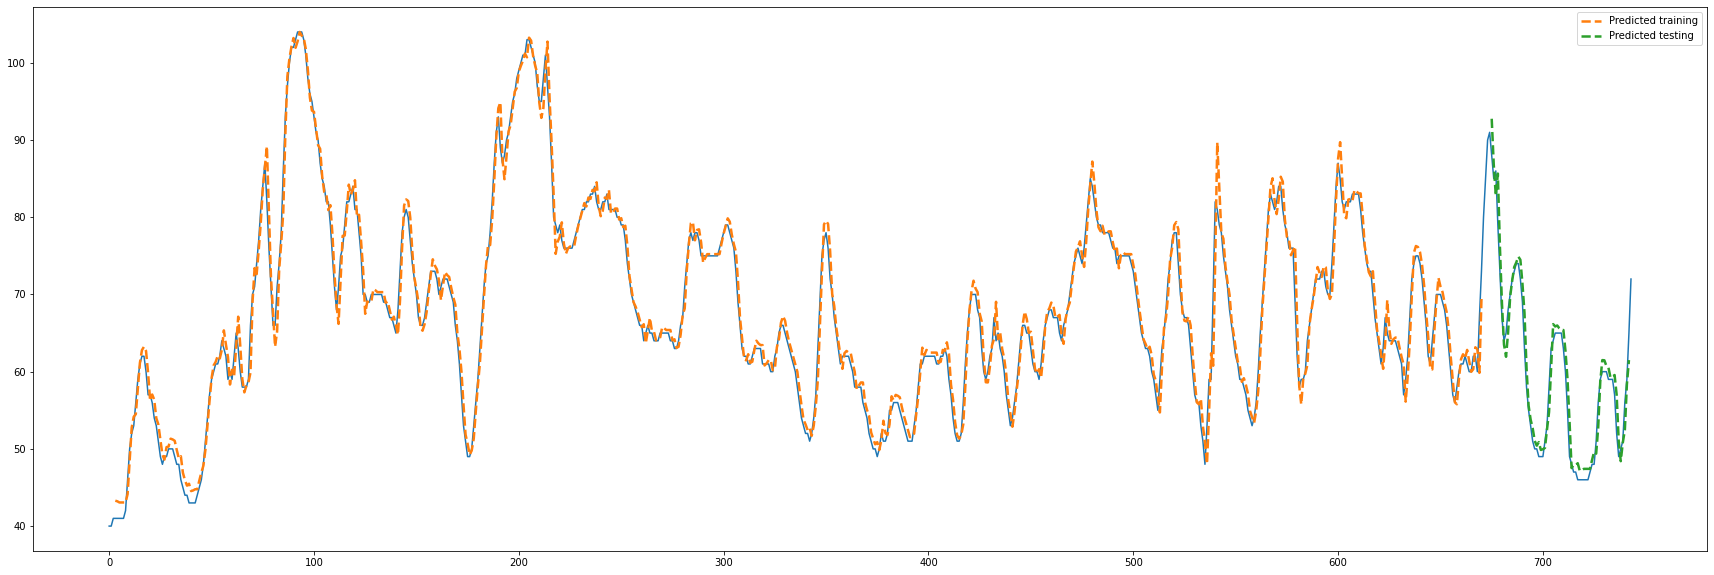

In [40]:
trainPredictPlot2 = np.empty_like(ddf)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back:len(trainPredict2)+look_back, :] = trainPredict2
# shift test predictions for plotting
testPredictPlot2 = np.empty_like(ddf)
testPredictPlot2[:, :] = np.nan
testPredictPlot2[len(trainPredict2)+(look_back*2)+1:len(ddf)-1, :] = testPredict2
# plot baseline and predictions
fig = plt.figure(figsize=(30, 10))
plt.plot(scaler.inverse_transform(ddf))
plt.plot(trainPredictPlot2, linestyle = 'dashed', label = 'Predicted training', linewidth = 2.5)
plt.plot(testPredictPlot2, linestyle = 'dashed', label = 'Predicted testing', linewidth = 2.5)
plt.legend()
plt.show()

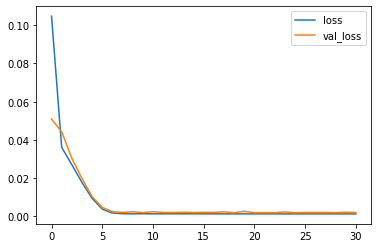

In [41]:
plt.plot(r1.history['loss'], label = 'loss')
plt.plot(r1.history['val_loss'], label = 'val_loss')
plt.legend()

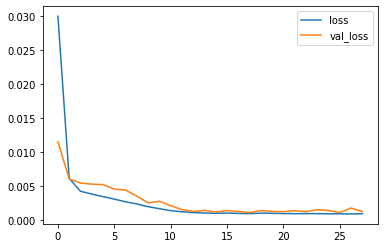

In [42]:
plt.plot(r2.history['loss'], label = 'loss')
plt.plot(r2.history['val_loss'], label = 'val_loss')
plt.legend()

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 128       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
